# Assignments

The best way to learn plotting is to make a lot of plots. To complete the following you may need to explore [the seaborn documentation](http://seaborn.pydata.org/index.html).

1. Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
    + Choose one variable and plot that variable four different ways.
    + Choose two continuous variables, and plot them three different ways.
    + Choose one continuous variable and one categorical variable, and plot them six different ways.
    + Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.
2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
    + Probability distributions
    + Bivariate relationships
    + Whether the distributions or the relationships vary across groups
    + Accompany your plot with a written description of what you see.

## Dataset 1 NCHS - Leading Causes of Death: United States

This dataset presents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999. Data are based on information from all resident death certificates filed in the 50 states and the District of Columbia using demographic and medical characteristics. Age-adjusted death rates (per 100,000 population) are based on the 2000 U.S. standard population. 

Among 6 variables in this dataset, Year, 113 Cause Name, Cause Name, and State are categorical variables, while Deaths and Age-adjusted Death Rate are continous varaibles. 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Read in data 
lcd = pd.read_csv("NCHS_-_Leading_Causes_of_Death__United_States.csv", index_col=0)
lcd.head(5)

,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
Year,,,,,
2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


### Plots for Age-adjusted Death Rate (AADR)

Plot 1: Density Plot

+ pro: easy to see the shape of AADR distribution; provide density estimates
- con: hard to tell central tendency as it doesn't follow normal distribution

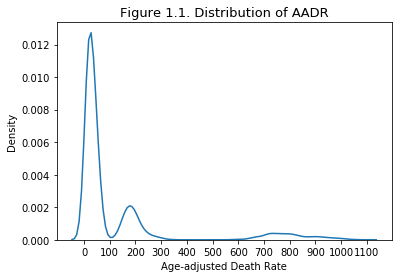

In [17]:
sns.kdeplot(lcd['Age-adjusted Death Rate'], legend=False)
plt.xticks(np.arange(0,1200, 100))
plt.title("Figure 1.1. Distribution of AADR", fontsize=13)
plt.xlabel('Age-adjusted Death Rate')
plt.ylabel('Density')

plt.show()

Plot 2: Histogram

+ pros: easy to see the distribution of AADR and corresponding counts
- cons: hard to tell central tendency if it doesn't follow a normal distribution

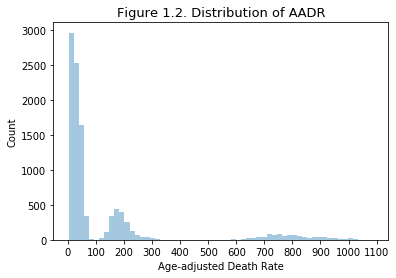

In [18]:
#Histogram
sns.distplot(lcd['Age-adjusted Death Rate'], kde=False, bins=60)
plt.xticks(np.arange(0,1200, 100))
plt.title("Figure 1.2. Distribution of AADR", fontsize=13)
plt.ylabel('Count')

plt.show()

Plot 2: Box Plot 
+ pros: displays range and distribution along a number line; indicates symmetry and skewness; identifies outliers
+ cons: not intuitive to see orignal data; cannot identify mean and mode

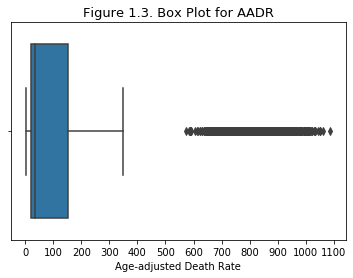

In [19]:
#Boxplot 
sns.boxplot(x=lcd['Age-adjusted Death Rate'])
plt.xticks(np.arange(0,1200, 100))
plt.title("Figure 1.3. Box Plot for AADR", fontsize=13)

plt.show()

Plot 4: Cumulative Distribution Function (CDF)
+ pro: easy to see the percent of any given threshold
+ con: hard to tell shape of distribution and central tendency

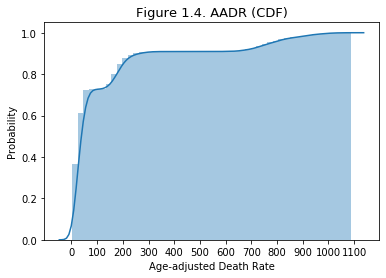

In [20]:
#CDF 
sns.distplot(lcd['Age-adjusted Death Rate'],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.xticks(np.arange(0,1200, 100))
plt.title("Figure 1.4. AADR (CDF)", fontsize=13)
plt.ylabel('Probability')

plt.show()

Plot 5: QQ-plot 
+ pros: examines if AADR follows a normal distribution
+ cons: doesn't show much of other information

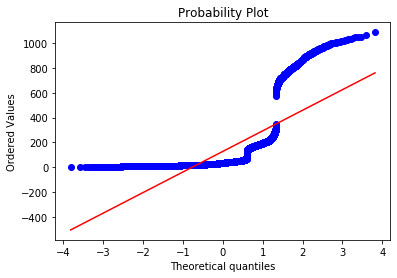

In [21]:
##QQ plot
from scipy import stats
stats.probplot(lcd['Age-adjusted Death Rate'], plot=sns.mpl.pyplot)

plt.show()

### Plots for Age-adjusted Death Rate (AADR) and Deaths

Plot 1: Histogram

+ pro: easy to see the distribution of AADR and corresponding counts
- con: hard to tell central tendency if it doesn't follow normal distribution

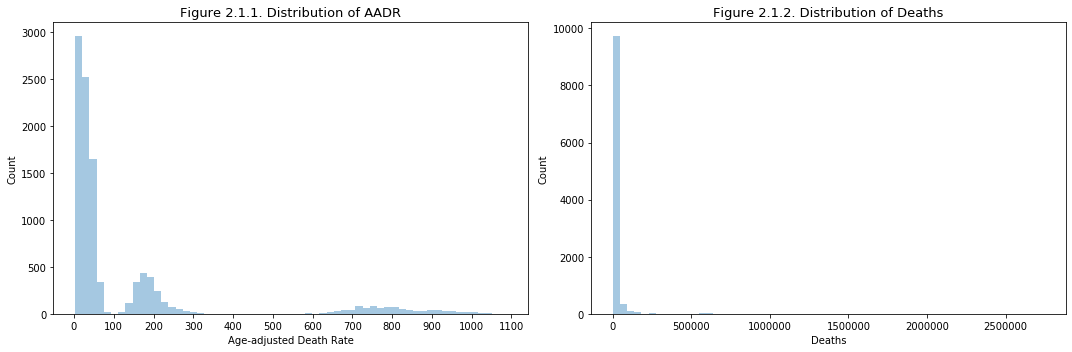

In [22]:
#Histogram
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(lcd['Age-adjusted Death Rate'], kde=False, bins=60)
plt.ylabel('Count')
plt.xticks(np.arange(0,1200, 100))
plt.title('Figure 2.1.1. Distribution of AADR', fontsize=13)

plt.subplot(1,2,2)
sns.distplot(lcd['Deaths'], kde=False, bins=60)
plt.ylabel('Count')
#ax.set(xscale="log")
plt.title('Figure 2.1.2. Distribution of Deaths', fontsize=13)

plt.tight_layout()
plt.show()

Plot 2: Box Plot 
+ pros: displays range and distribution along a number line; indicates symmetry and skewness; identifies outliers
+ cons: not intuitive to see orignal data; cannot identify mean and mode

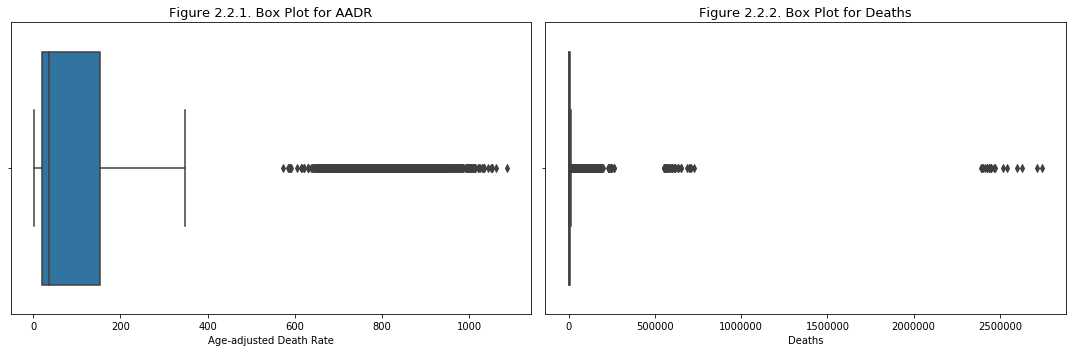

In [23]:
#Box plot: what's the best way to remove outliers for these two variables? >3SD? 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='Age-adjusted Death Rate', data=lcd)
plt.title('Figure 2.2.1. Box Plot for AADR', fontsize=13)

plt.subplot(1,2,2)
sns.boxplot(x='Deaths', data=lcd)
plt.title('Figure 2.2.2. Box Plot for Deaths', fontsize=13)

plt.tight_layout()
plt.show()

Plot 3: Scatter Plot
+ pros: easy to see relationship between these two variables
+ con: not intuitive to see distributions

In [24]:
#Standardization 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
num = pd.DataFrame(lcd, columns=['Age-adjusted Death Rate', 'Deaths'])
num = num[num['Age-adjusted Death Rate'] < 500]
num = pd.DataFrame(scaler.fit_transform(num), columns=['Age-adjusted Death Rate', 'Deaths'])

In [44]:
#sns.distplot(num['Age-adjusted Death Rate'])

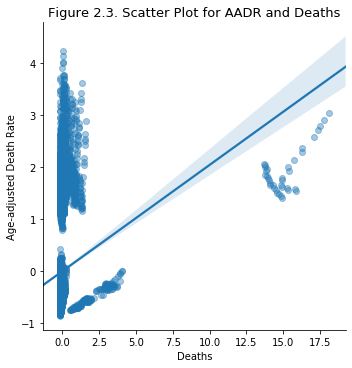

In [25]:
#Scatterplot
sns.lmplot(x='Deaths', y='Age-adjusted Death Rate', data=num, fit_reg=True, scatter_kws={'alpha':0.4})
plt.title('Figure 2.3. Scatter Plot for AADR and Deaths', fontsize=13)
plt.show()

### Plots for Age_adjusted Death Rate (AADR) and Cause Name

Plot 1: Box Plot 
+ pros: displays range and distribution along a number line; indicates symmetry and skewness; identifies outliers
+ cons: not intuitive to see orignal data; cannot identify mean and mode

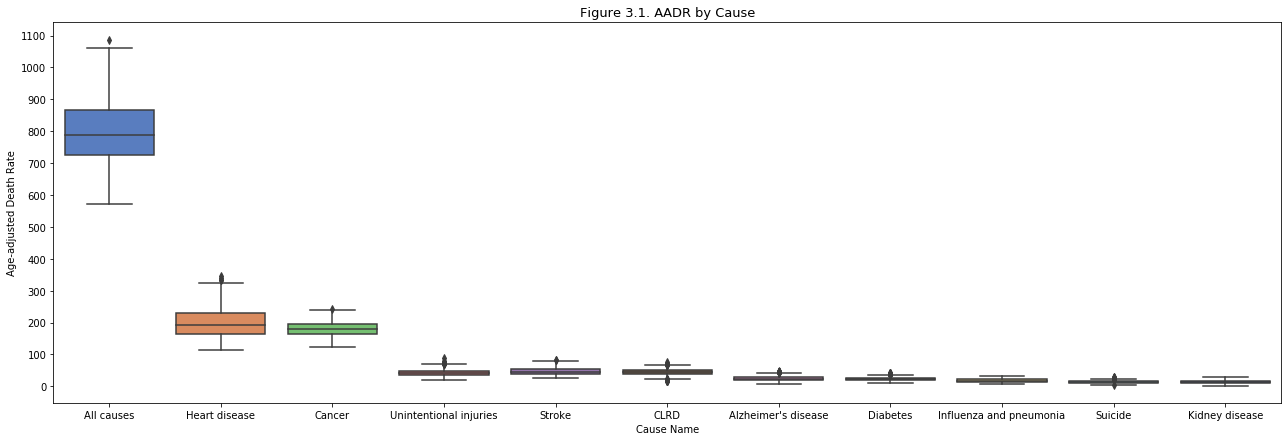

In [26]:
#Box plot
plt.figure(figsize=(22,7))
lcd = lcd.sort_values(by=['Age-adjusted Death Rate'], ascending=False)
sns.boxplot(x='Cause Name', y='Age-adjusted Death Rate', data=lcd, palette='muted')
plt.title('Figure 3.1. AADR by Cause', fontsize=13)
plt.yticks(np.arange(0,1200,100))

plt.show()

Plot 2: Bar Plot 
+ pros: easily compare AADR across Cause Names
+ cons: no information about distribution 

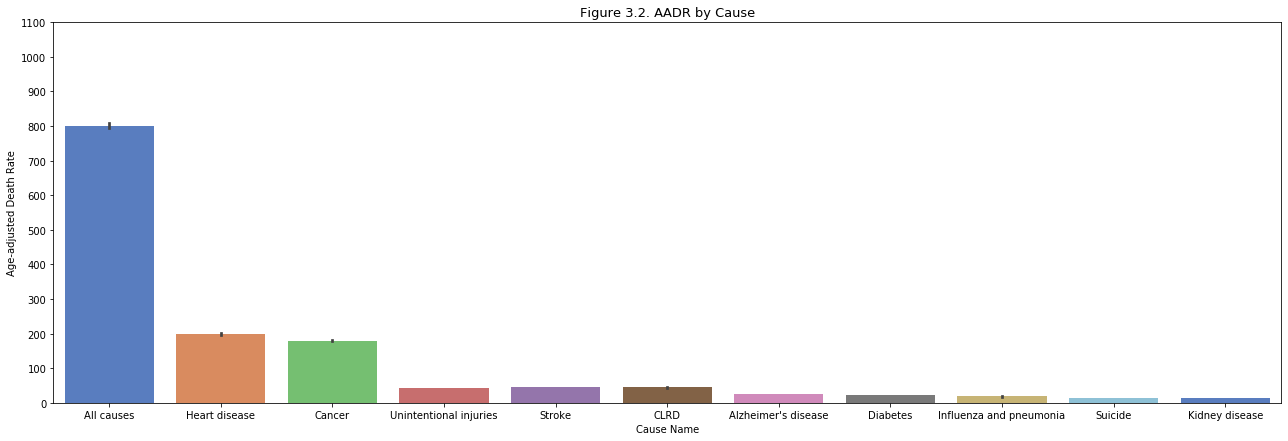

In [28]:
#Bar plot
plt.figure(figsize=(22,7))
sns.barplot(x='Cause Name', y='Age-adjusted Death Rate', data=lcd, palette='muted')
plt.title('Figure 3.2. AADR by Cause', fontsize=13)
plt.yticks(np.arange(0,1200,100))

plt.show()

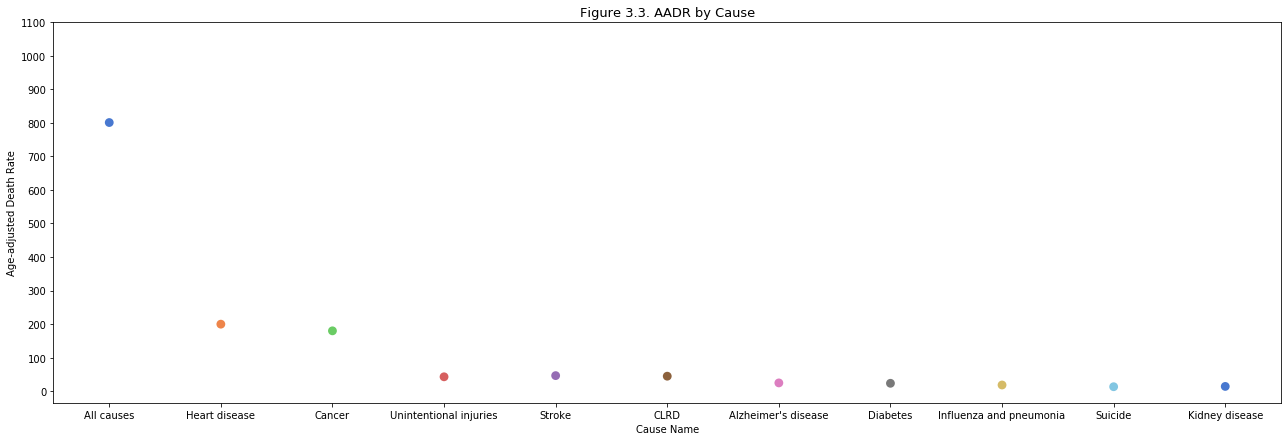

In [29]:
#Point plot
plt.figure(figsize=(22,7))
sns.pointplot(x='Cause Name', y='Age-adjusted Death Rate', data=lcd, palette='muted')
plt.title('Figure 3.3. AADR by Cause', fontsize=13)
plt.yticks(np.arange(0,1200,100))

plt.show()

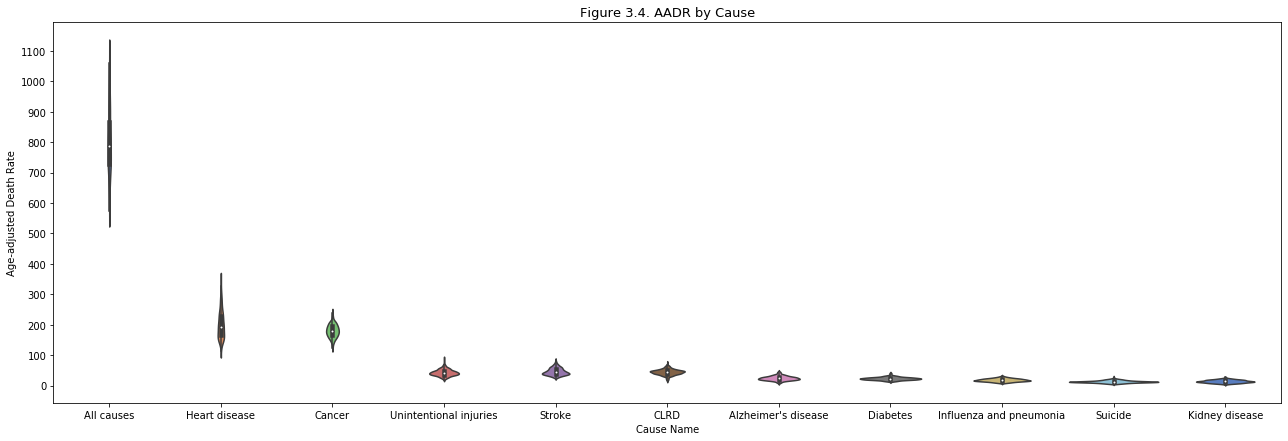

In [30]:
#Violin plot
plt.figure(figsize=(22,7))
sns.violinplot(x='Cause Name', y='Age-adjusted Death Rate', data=lcd, palette='muted')
plt.title('Figure 3.4. AADR by Cause', fontsize=13)
plt.yticks(np.arange(0,1200,100))

plt.show()

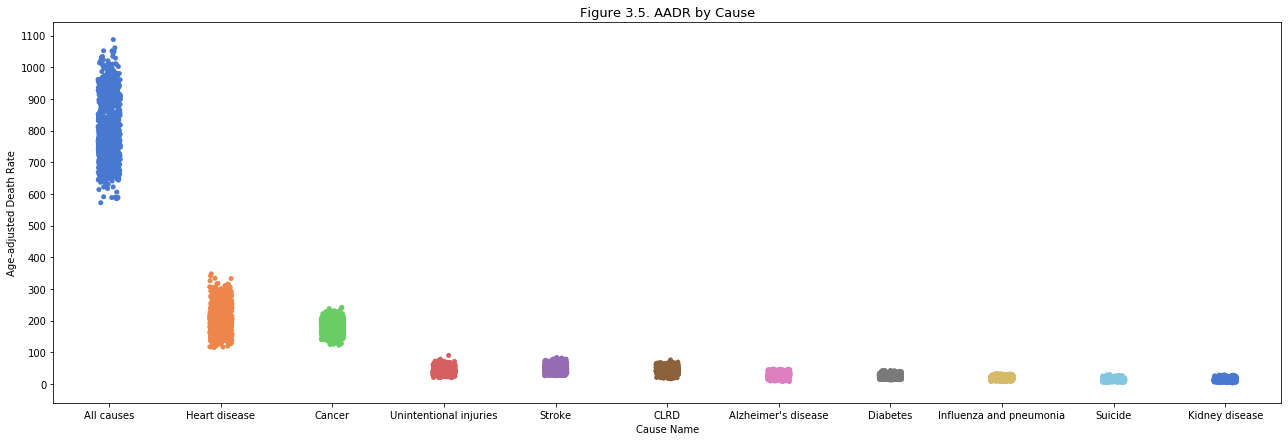

In [31]:
#Strip plot
plt.figure(figsize=(22,7))
sns.stripplot(x='Cause Name', y='Age-adjusted Death Rate', data=lcd, palette='muted')
plt.title('Figure 3.5. AADR by Cause', fontsize=13)
plt.yticks(np.arange(0,1200,100))

plt.show()

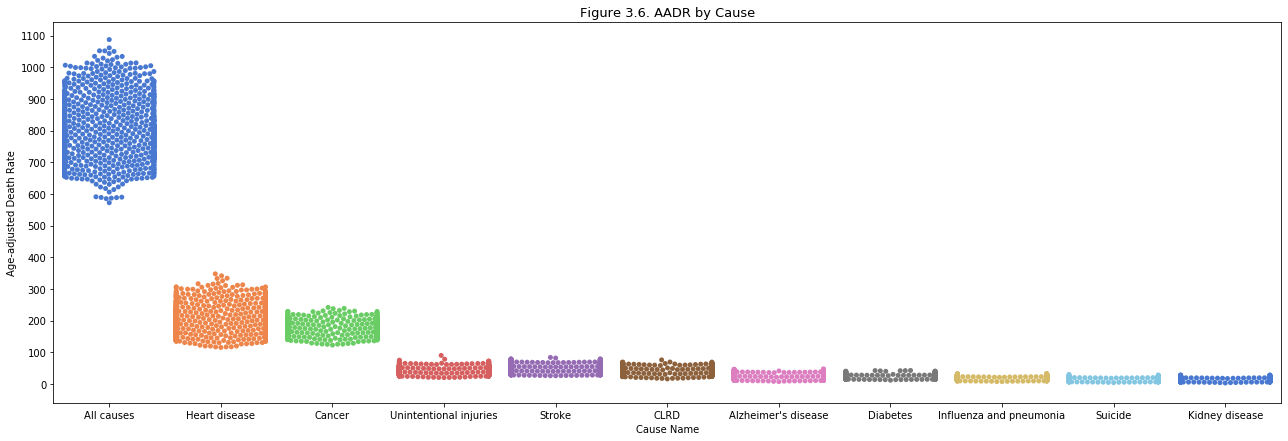

In [28]:
#Swarm plot: this plot seems to take longer time to generate
plt.figure(figsize=(22,7))
sns.swarmplot(x='Cause Name', y='Age-adjusted Death Rate', data=lcd, palette='muted')
plt.title('Figure 3.6. AADR by Cause', fontsize=13)
plt.yticks(np.arange(0,1200,100))

plt.show()

## Dataset 2  California Housing Price

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows:

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

Variables used in the plots are one categorical variable ocean_proximity, and four continuous variables housing_median_age, total_rooms, , and median_house_value. 

In [13]:
hou = pd.read_csv('housing.csv')#, index_col=0)
#hou.head()

In [8]:
#hou.describe()

In [9]:
#hou2 = hou[['ocean_proximity', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'median_house_value']]
#sns.pairplot(hou2, kind='scatter', hue='ocean_proximity', palette='Dark2')
#plt.show()

In [10]:
#corr = hou2.groupby('ocean_proximity').corr().round(3)
#corr.style.background_gradient(cmap='coolwarm')

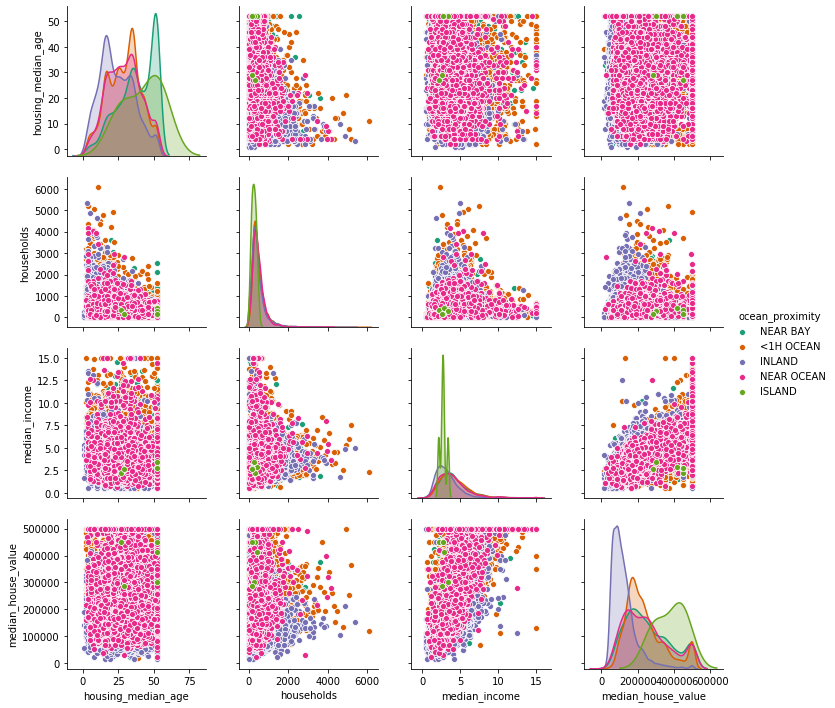

In [14]:
hou3 = hou[['ocean_proximity', 'housing_median_age', 'households', 'median_income', 'median_house_value']]
sns.pairplot(hou3, kind='scatter', hue='ocean_proximity', palette='Dark2')
plt.show()

In [15]:
#hou['ocean_proximity'].value_counts()

## Alternative Dataset Iris Data
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Species.

In [4]:
#Alternative dataset to better see the plot 
iris = pd.read_csv('iris.csv').drop(columns=['Id'])
#iris.head()

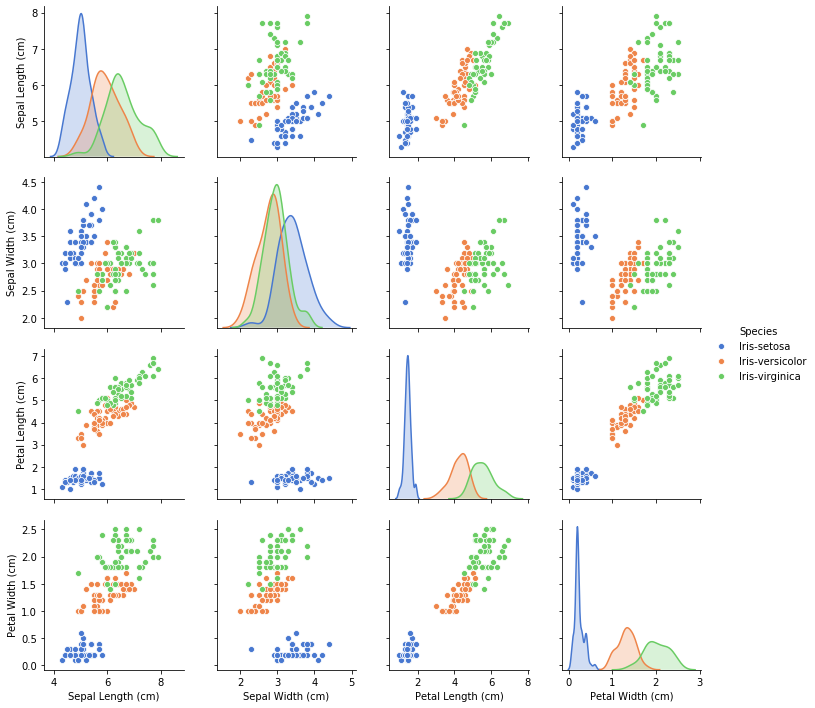

In [3]:
sns.pairplot(iris, kind="scatter", hue='Species', palette='muted', )
plt.show()

+ Sepal Length 

Sepal length of 3 species follows similar close-to-normal distribution. On average, Iris-setosa has shortest sepal, iris-versicolor has longer sepal, and iris-virginica has the longest sepal. In terms of correlation with sepal width, iris-setosa has the highest correlation, followed by iris-versicolor and virginica. With respect to correlation with petal length, iris-virginica has the highest correlation, followed by iris-versicolor and iris-setosa. Lastly, iris-versicolor has the highest correlation with petal width, followed by iris-virginica and iris-setosa. 

+ Sepal Width 

Sepal width of 3 species follows similar normal distribution. On average, iris-versicolor has the least wide sepal, iris-virginica has wider sepal, and iris-setosa has the widest sepal. In terms of correlation with petal length, iris-versicolor has the highest, followed by iris-virginica and iris-setosa. Lastly, iris-versicolor has the highest correlation with petal width, followed by iris-virginica and iris-setosa. 

+ Petal Length 

Petal length of 3 species follows similar close-to-normal distribution. On average, iris-setosa has shortest petal, iris-versicolor has longer petal, and iris-virginica has the longest petal. In terms of correlation with petal width, iris-versicolor has the highest correlation, followed by iris-setosa and iris-virginica. 

+ Petal Width 

Petal width of 3 species follows multi-modal distribution. On average, iris-setosa has the least wide petal, iris-versicolor has wider petal, and iris-virginica has the widest petal. 



In [ ]:
#corr = iris.groupby('Species').corr().round(3)
#corr.style.background_gradient(cmap='coolwarm')